### Import Module

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np

### Extract image

In [21]:
image_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20, 
        brightness_range=(0.5,1.0), 
        shear_range=0.2, 
        zoom_range=(0.8,1.0), 
        fill_mode='nearest', 
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.3
)

val_gen = ImageDataGenerator(
    rescale=1./255,
)

test_gen = ImageDataGenerator(
    rescale=1./255,
)

In [22]:
image_shape = (128, 128, 1)
batch_size = 128

In [23]:
train_img = image_gen.flow_from_directory(
    r'C:\xampp\htdocs\PA\PA_KB_B2_20_5\datasets\train',
    target_size=image_shape[:-1],
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset='training'
)
validation_img = image_gen.flow_from_directory(
    r'C:\xampp\htdocs\PA\PA_KB_B2_20_5\datasets\train',
    target_size=image_shape[:-1],
    batch_size=64,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset='validation'
)

Found 3614 images belonging to 7 classes.
Found 1544 images belonging to 7 classes.


In [24]:
test_img = test_gen.flow_from_directory(
    r'C:\xampp\htdocs\PA\PA_KB_B2_20_5\datasets\test',
    target_size=image_shape[:-1],
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 907 images belonging to 7 classes.


In [6]:
val_name = train_img.class_indices
class_name = []
for i in val_name.keys():
    class_name.append(i)

In [7]:
class_name

['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'Sedan', 'Wagon']

In [8]:
image, label = train_img.next()

In [9]:
len(image)

128

In [10]:
label

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
 

In [11]:
print(image.shape)

(128, 128, 128, 1)


In [12]:
gambar = tf.reshape(image[3],(128,128))

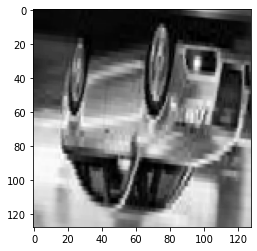

In [13]:
plt.imshow(gambar,cmap = 'gray')


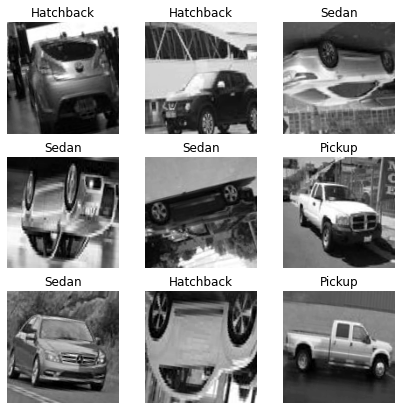

In [14]:
plt.figure(figsize=(7,7))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i],cmap = 'gray')
    plt.title(class_name[np.argmax(label[i])])
    plt.axis("off")

### Transforms Image

In [15]:
# def normalize_img(image, label):
#     return tf.cast(image, tf.float32)/255, label

# # Create a data augmentation stage with horizontal flipping, rotations, zooms
# data_augmentation = Sequential(
#     [
#         tf.keras.layers.RandomFlip("horizontal"),
#         tf.keras.layers.RandomRotation(0.2),
#         tf.keras.layers.RandomZoom(0.2),
#         tf.keras.layers.RandomTranslation(0.3, 0.2),
#         tf.keras.layers.RandomContrast(0.2)
#     ]
# )
# train_img = train_img.map(lambda x, y: (data_augmentation(x), y))
# train_img = train_img.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# train_img = train_img.cache()
# # train_img = train_img.batch(batch_size)
# train_img = train_img.prefetch(tf.data.AUTOTUNE)

# validation_img = validation_img.map(lambda x, y: (data_augmentation(x), y))
# validation_img = validation_img.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# validation_img = validation_img.cache()
# # validation_img = validation_img.batch(batch_size)
# validation_img = validation_img.prefetch(tf.data.AUTOTUNE)


# test_img = test_img.map(lambda x, y: (data_augmentation(x), y))
# test_img = test_img.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# test_img = test_img.cache()
# # test_img = test_img.batch(batch_size)
# test_img = test_img.prefetch(tf.data.AUTOTUNE)


In [37]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)), #input layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax') # output Layer
])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)     

In [39]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
monitor_val_acc = tf.keras.callbacks.EarlyStopping(monitor='accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=5)

In [42]:
history = model.fit(
    train_img, 
    epochs=25,
    validation_data=validation_img,
    callbacks=[monitor_val_acc]
)

Epoch 1/25
29/29 [==============================] - 96s 3s/step - loss: 1.8280 - accuracy: 0.3033 - val_loss: 1.8103 - val_accuracy: 0.3083
Epoch 2/25
29/29 [==============================] - 101s 3s/step - loss: 1.8131 - accuracy: 0.3077 - val_loss: 1.8090 - val_accuracy: 0.3083
Epoch 3/25
29/29 [==============================] - 99s 3s/step - loss: 1.8097 - accuracy: 0.3077 - val_loss: 1.8082 - val_accuracy: 0.3083
Epoch 4/25
29/29 [==============================] - 99s 3s/step - loss: 1.8027 - accuracy: 0.3102 - val_loss: 1.8010 - val_accuracy: 0.3083
Epoch 5/25
29/29 [==============================] - 92s 3s/step - loss: 1.7842 - accuracy: 0.3069 - val_loss: 1.7825 - val_accuracy: 0.3083
Epoch 6/25
29/29 [==============================] - 92s 3s/step - loss: 1.7659 - accuracy: 0.3121 - val_loss: 1.7651 - val_accuracy: 0.3251
Epoch 7/25
29/29 [==============================] - 97s 3s/step - loss: 1.7495 - accuracy: 0.3204 - val_loss: 1.7644 - val_accuracy: 0.3232
Epoch 8/25
29/29 [=

KeyboardInterrupt: 